In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [5]:
df=pd.read_csv('./../P3_Weather.csv',encoding='latin-1')

C:\Users\Sonal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [8]:
df.isna().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [9]:
df.drop(['WindGustSpd','PoorWeather','DR','SPD','SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],axis=1,inplace=True)

## Simple Linear Regression

In [10]:
X=df['MinTemp'].values.reshape(-1,1)
y=df['MaxTemp'].values.reshape(-1,1)

In [11]:
lr=LinearRegression()

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred=lr.predict(X_test)

In [15]:
mean_absolute_error(y_test,y_pred)

3.1993291783785285

In [16]:
mean_squared_error(y_test,y_pred)

17.631568097568444

In [17]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.198996082109204

In [18]:
n_df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})

<AxesSubplot:>

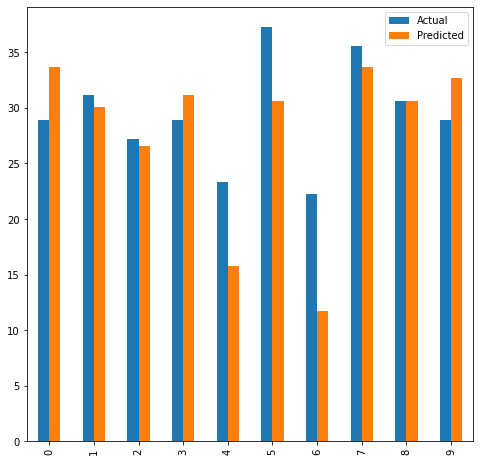

In [27]:
n_df[:10].plot(kind='bar',figsize=(8,8))

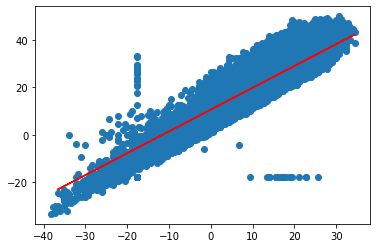

In [33]:
plt.scatter(X,y)
plt.plot(X_test,y_pred,c='r')

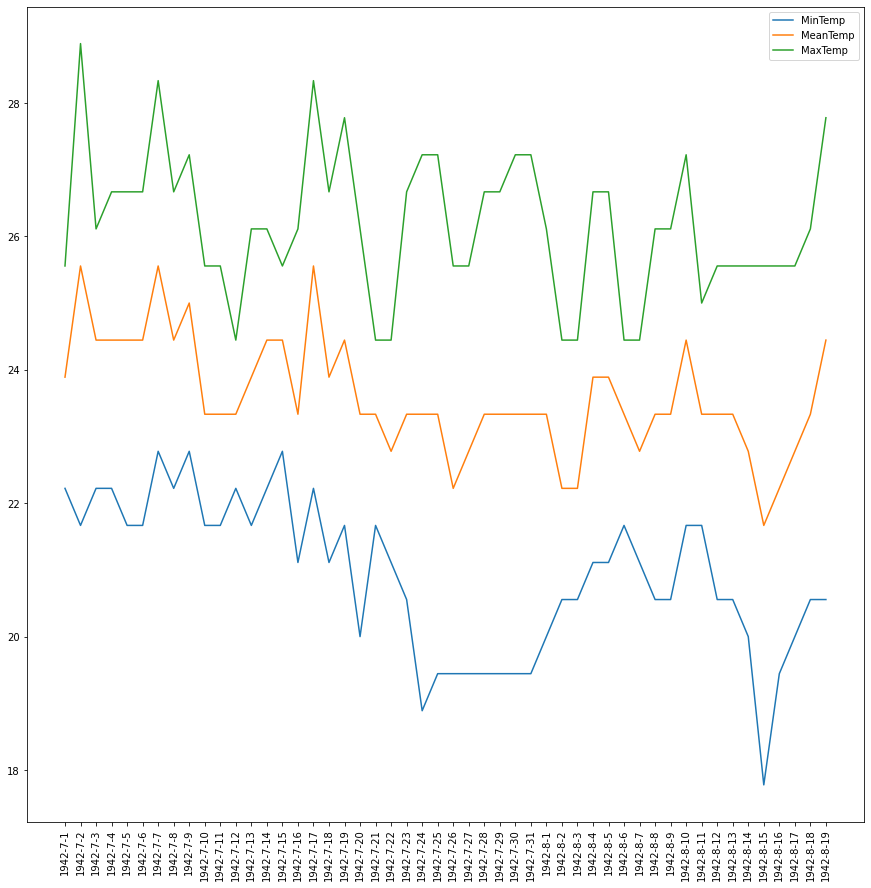

In [55]:
plt.figure(figsize=(15,15))
plt.plot(df['Date'][:50],df['MinTemp'][:50],label='MinTemp')
plt.plot(df['Date'][:50],df['MeanTemp'][:50],label='MeanTemp')
plt.plot(df['Date'][:50],df['MaxTemp'][:50],label='MaxTemp')
plt.xticks(rotation=90)
plt.legend()

## Multiple Linear Regression

In [56]:
df.columns

Index(['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall',
       'YR', 'MO', 'DA', 'PRCP', 'MAX', 'MIN', 'MEA', 'SNF'],
      dtype='object')

In [57]:
df.isna().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
dtype: int64

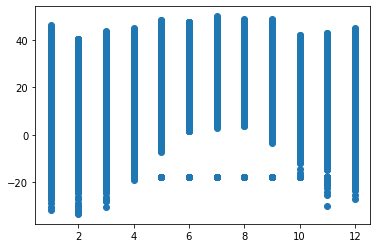

In [59]:
plt.scatter(df['MO'],df['MaxTemp'])

In [67]:
X=df[['MO','MinTemp','MeanTemp','STA']]

In [68]:
y=df['MaxTemp']

In [69]:
lr1=LinearRegression()

In [70]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [71]:
lr1.fit(X1_train,y1_train)

LinearRegression()

In [72]:
y1_pred=lr1.predict(X1_test)

In [73]:
mean_absolute_error(y1_test,y1_pred)

0.40007927852097586